<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/visual_interface_image_processing_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this example, we are exploring how to build a (very basic) computer vision interface for image processing purposes.


<center><img src="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/visual_interface_output.png"></center>

# Visual interface for image processing

As first step, we can download the sample images, which are going to be processed later.

In [ ]:
# Download sample images:
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/lenna.png
!wget https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/flowers.png

We can include all the required packages needed to run this example.

In [2]:
#Import required packages:
import cv2
import numpy as np
import ipywidgets as widgets
import os
from google.colab.patches import cv2_imshow
from IPython.display import clear_output

Additionally, we load the `path_images` for each image to be processed later.

In [3]:
#Load the path of the images:
DIR_PATH = '/content'
included_extensions = ('.jpg','.jpeg', '.png')

path_images = [f for f in os.listdir(DIR_PATH) if any(f.endswith(ext) for ext in included_extensions)]

print("Loaded images: '{}'".format(path_images))

if not path_images:
  print("Please, consider downloading some images (with the required extension) before proceding further with this notebook")

Loaded images: '['lenna.png', 'flowers.png']'


As a note, we can load the `path_images` using `glob`:

In [4]:
import glob

included_types = ('*.jpg', '*.jpeg', '*.png')
path_images = []
for files in included_types:
    path_images.extend(glob.glob(files))

print("Loaded images: '{}'".format(path_images))

Loaded images: '['lenna.png', 'flowers.png']'


We create three buttons:

In [5]:
# Create the buttons:
# Create the 'main' button:
load_button = widgets.Button(description='Load', button_style='success')

# Create the 'menu' buttons
thres_button = widgets.Button(description='Threshold')
canny_button = widgets.Button(description='Canny')

We create the functions to be called when 'on click' event will take place. Additionally, we also define the function to display the menu. Note that function `on_click_load()` loads the image (in grayscale):

`img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)`

This is because in the two image processing functions that we are showing (canny and threshold) the image needs to be in grayscale mode. Take this into account if additional processing algorithms are added. 

In [6]:
# Create the functions to be called:
def display_menu():
  selector_box = widgets.HBox([file_selector, load_button])
  display(selector_box)  
  button_box = widgets.HBox([thres_button, canny_button])
  display(button_box)

def show_everything(img_res, show_res = False):
  clear_output()
  display_menu()
  if show_res:
    res = np.hstack((img, img_res))
    res = cv2.copyMakeBorder(res, 5, 5, 5, 5, cv2.BORDER_CONSTANT)
    cv2_imshow(res)
  else:
    cv2_imshow(img_res)

def on_click_load(button):
  global img
  path_img = os.path.join(DIR_PATH, file_selector.value)
  img = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
  show_everything(img)

def on_click_threshold(button):
  global img
  try:
    res = threshold_image_processing(img)
    show_everything(res, show_res=True)
  except NameError:
    print("Load the image first!")

def on_click_canny(button):
  global img
  try:
    res = canny_img_processing(img)
    show_everything(res, show_res=True)
  except NameError:
    print("Load the image first!")

We register for each button the corresponding method that will take place when clicking on each one:

In [7]:
# Define on_click method for each button:
load_button.on_click(on_click_load)
thres_button.on_click(on_click_threshold)
canny_button.on_click(on_click_canny)

We algo create two methods for processing the images: one for each processing type corresponding for each option in the menu.

In [8]:
# Define the threshold function:
def threshold_image_processing(input_img):
  ret, thresh_result = cv2.threshold(input_img, threshold_param, 255, cv2.THRESH_BINARY)
  return thresh_result

# Define the canny processing function:
def canny_img_processing(input_img):
  canny_res = cv2.Canny(input_img, min_val_canny_param, max_val_canny_param, aperture_size_canny_param)
  return canny_res

Set the parameters of this functions with sliders as follows.

In [9]:
#@title Threshold parameters { run: "auto" }
threshold_param = 116 #@param {type:"slider", min:1, max:255, step:1}

In [10]:
#@title Canny parameters { run: "auto" }
min_val_canny_param = 220 #@param {type:"slider", min:0, max:360, step:10}
max_val_canny_param = 100 #@param {type:"slider", min:0, max:255, step:10}
aperture_size_canny_param = 12 #@param {type:"slider", min:3, max:12, step:3}

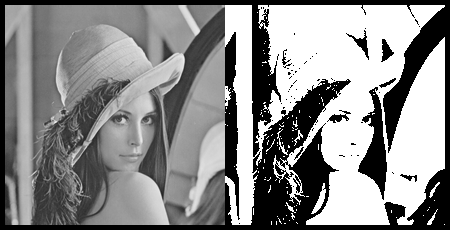

In [11]:
try:
  file_selector = widgets.Dropdown(options=path_images, description='Image:')
  display_menu()
except Exception as e:
  print("Something went wrong: ", e.__class__, "occurred.")
  print("Please, consider downloading some images before calling this piece of code") 

# Conclusions

It you work a lot with image processing and setting the required parameters for each function is a key point in your processing pipeline, this notebook can be useful. In this notebook we have seen how to build a very simple visual interface for image processing purposes. It can be extended more options in the menu.